# Polynomial Curve Fitting

This notebook demonstrates how to fit sample points to a polynomial curve and visualize the results.


In [22]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Generate Sample Points


In [ ]:
# Points are material color data:
r = [244, 233, 156, 103, 63, 33, 3, 0, 0, 76, 139, 205, 255, 255, 255, 255]
g = [67, 30, 39, 58, 81, 150, 169, 188, 150, 175, 195, 220, 235, 193, 152, 87]
b = [54, 99, 176, 183, 181, 243, 244, 212, 136, 80, 74, 57, 59, 7, 0, 34]

# Create x values (indices)
x = np.arange(len(r))

## Fit Polynomial Curve

Fit the points to a polynomial.


In [30]:
# Fit polynomial for each RGB channel
degree = 6

# Fit polynomials
r_coefficients = np.polyfit(x, r, degree)
g_coefficients = np.polyfit(x, g, degree)
b_coefficients = np.polyfit(x, b, degree)

r_poly = np.poly1d(r_coefficients)
g_poly = np.poly1d(g_coefficients)
b_poly = np.poly1d(b_coefficients)

# Format coefficients nicely
r_coef_str = [f"{c:.2f}" for c in r_coefficients]
g_coef_str = [f"{c:.2f}" for c in g_coefficients]
b_coef_str = [f"{c:.2f}" for c in b_coefficients]

print(f"R polynomial: [{', '.join(r_coef_str)}]")
print(f"G polynomial: [{', '.join(g_coef_str)}]")
print(f"B polynomial: [{', '.join(b_coef_str)}]")

# Generate smooth curves for visualization
x_smooth = np.linspace(x.min(), x.max(), 300)
r_smooth = r_poly(x_smooth)
g_smooth = g_poly(x_smooth)
b_smooth = b_poly(x_smooth)

R polynomial: [0.00, -0.09, 1.22, -6.38, 10.86, -46.23, 251.25]
G polynomial: [0.00, -0.06, 1.27, -12.96, 62.80, -102.68, 71.86]
B polynomial: [0.00, -0.03, 0.62, -6.25, 20.15, 27.16, 57.37]


## Display Plot


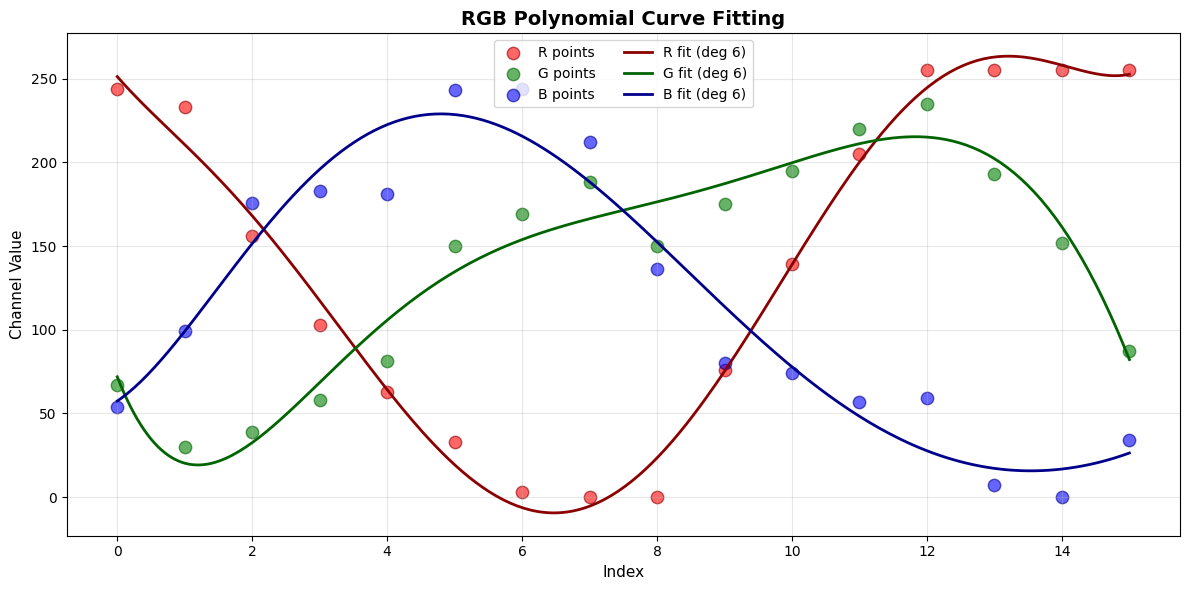

In [31]:
# Create a single plot overlaying all channels
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter original points
ax.scatter(x, r, color='red', label='R points', s=80, alpha=0.6, edgecolors='darkred')
ax.scatter(x, g, color='green', label='G points', s=80, alpha=0.6, edgecolors='darkgreen')
ax.scatter(x, b, color='blue', label='B points', s=80, alpha=0.6, edgecolors='darkblue')

# Plot fitted curves
ax.plot(x_smooth, r_smooth, color='darkred', linewidth=2, label=f'R fit (deg {degree})')
ax.plot(x_smooth, g_smooth, color='darkgreen', linewidth=2, label=f'G fit (deg {degree})')
ax.plot(x_smooth, b_smooth, color='darkblue', linewidth=2, label=f'B fit (deg {degree})')

# Labels and formatting
ax.set_xlabel('Index', fontsize=11)
ax.set_ylabel('Channel Value', fontsize=11)
ax.set_title('RGB Polynomial Curve Fitting', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, ncol=2)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Display 32 circles with colors from the fitted curves.

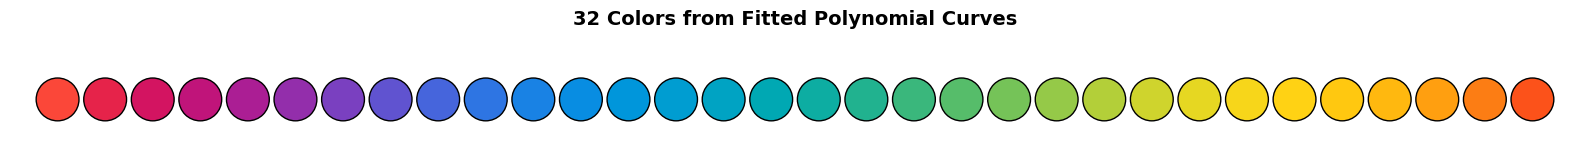

In [32]:
# Generate 32 evenly spaced positions along the fitted curves
num_circles = 32
x_circles = np.linspace(x.min(), x.max(), num_circles)

# Get RGB values from the fitted polynomials
r_values = np.clip(r_poly(x_circles), 0, 255).astype(int)
g_values = np.clip(g_poly(x_circles), 0, 255).astype(int)
b_values = np.clip(b_poly(x_circles), 0, 255).astype(int)

# Create figure with circles
fig, ax = plt.subplots(figsize=(16, 3))

# Draw circles with fitted colors
for i in range(num_circles):
    color = (r_values[i]/255, g_values[i]/255, b_values[i]/255)
    circle = plt.Circle((i, 0), 0.45, color=color, ec='black', linewidth=1)
    ax.add_patch(circle)

# Set plot limits and appearance
ax.set_xlim(-1, num_circles)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('32 Colors from Fitted Polynomial Curves', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()